In [8]:
df = pd.read_csv('deaths.csv')
df.head(100)

,death_number,username,player_name,rank,cause_of_death,brute_damage,brain_damage,fire_damage,oxy_damage,tox_damage,clone_damage,stamina_damage
0,,AuStation -,,,Blunt-Force Trauma,BRU,BRA,FIR,OXY,TOX,CLN,STM
1,1,rogueninja299,Sylar,Cook,Suffocation,60,0,11,200,0,0,0
2,2,mcterra,Cora Mathews,AI,Severe Burns,0,0,163,40,0,0,0
3,3,nyarlo,Ebba Endsley,Shaft Miner,Severe Burns,0,0,203,3,0,0,0
4,,AuStation -,,,Blunt-Force Trauma,BRU,BRA,FIR,OXY,TOX,CLN,STM
...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,apple107,Sofia Addison,Chemist,Poisoning,0,0,0,57,144,0,0
96,54,mcterra,Cora Mathews,Unassigned,Blunt-Force Trauma,0,0,0,0,0,0,0
97,55,mcterra,Laughing Man,Unassigned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,Traitor,Suffocation,0,0,0,200,0,0,0,NaN,NaN,NaN


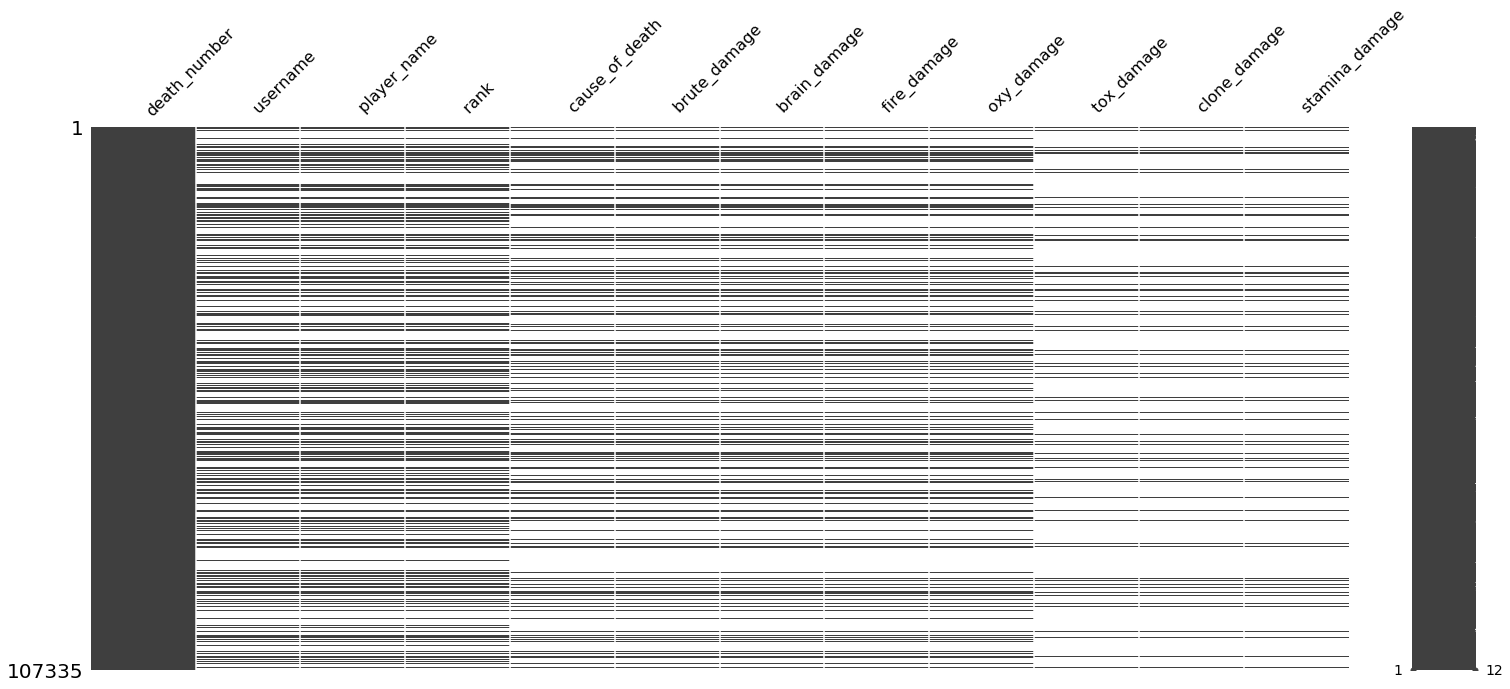

In [6]:
msno.matrix(df)

In [9]:
print(range(1000))

range(0, 1000)


In [4]:
import pandas as pd
import missingno as msno